In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from matplotlib import rcParams
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('C:/Users/nestj/OneDrive/Desktop/DD360/reto_precios (4).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   main_name             981 non-null    object 
 1   subtitle              981 non-null    object 
 2   link                  981 non-null    object 
 3   location              981 non-null    object 
 4   price                 981 non-null    object 
 5   attributes            981 non-null    object 
 6   timestamp             981 non-null    object 
 7   id                    981 non-null    int64  
 8   address               702 non-null    object 
 9   since                 981 non-null    object 
 10  description           981 non-null    object 
 11  vendor                981 non-null    object 
 12  lat                   981 non-null    float64
 13  lon                   981 non-null    float64
 14  price_mod             981 non-null    float64
 15  price_currency        9

Para este caso, tenemos variables que no tienen suficiente información que aporte al problema, a saber:
- cellars
- orientation
- floor_situated
- department_type
- disposition
- num_floors
- monthly fees
- apartments per floor

Las cuales serán removidas, ya que no tiene sentido dentro del análisis


In [4]:
df = df.drop(['cellars', 'orientation', 'floor_situated','department_type',
              'disposition', 'num_floors', 'monthly_fee', 'apartments_per_floor',
             'price','attributes'],axis=1)

### Queremos determinar en que colonia están estas viviendas

para esto, separamos de location la colonia (si es que el campo tiene todos los registros con la misma nomenclatura), por estar un poco más visible

In [5]:
adress = df["location"].str.split(',',expand=True)

adress.columns = ['calle','colonia','municipio-estado','otro1','otro2','otro3','otro4','otro5']

adress

colonia = pd.DataFrame(adress['colonia'])

In [6]:
df = pd.concat([df,colonia],axis=1) 

df = df.drop('location', axis=1)

In [7]:
df

,main_name,subtitle,link,timestamp,id,address,since,description,vendor,lat,...,days_on_site,amenities,age_in_years,bathrooms,parking_lots,num_bedrooms,m2,final_price,price_square_meter,colonia
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,Garden house con 2 habitaciones y dos baños c...,Investemx,19.421317,...,5.0,3.0,0.0,2.0,2,2.0,127.0,9000000.0,70866.141732,Roma Sur
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,2022-03-29,2,Tonala,Publicado hace 7 días,Mezcla perfecta entre E S T I L O y C A L I D ...,Avitana,19.421029,...,7.0,2.0,0.0,1.0,1,1.0,54.0,4264000.0,78962.962963,Roma Norte
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,2022-03-29,3,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",Publicado hace 4 días,"Concepto único en Roma Sur, es un desarrollo d...",Ebranuncios,19.407814,...,4.0,NaN,0.0,3.0,2,3.0,163.0,8093500.0,49653.374233,Roma Sur
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,2022-03-29,4,Linares,Publicado hace 5 meses por {action},[VEN] ID HM: 40395.En Houm hacemos todo más fá...,Houm,19.404992,...,150.0,2.0,0.0,2.0,1,2.0,93.0,4000000.0,43010.752688,Roma Sur
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,2022-03-29,5,Frontera,Publicado hace 52 días,"La mejor opción en Roma Norte, sólo 7 departam...",Contactobienesraicesgold,19.419693,...,52.0,4.0,0.0,2.0,1,2.0,103.0,6732700.0,65366.019417,Roma Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Monterrey 101,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,2022-03-29,981,Monterrey,Publicado hace 40 días,Departamento en preventa.,Coldwellbankerarsespacio,19.405777,...,40.0,NaN,0.0,2.0,2,2.0,140.0,6385000.0,45607.142857,Roma Sur
977,Monterrey 302,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,2022-03-29,982,Monterrey,Publicado hace 40 días,Departamento en Preventa.,Coldwellbankerarsespacio,19.405777,...,40.0,NaN,0.0,2.0,1,2.0,84.0,4116000.0,49000.000000,Roma Sur
978,Monterrey 201,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,2022-03-29,983,Monterrey,Publicado hace 40 días,Departamento en Preventa.,Coldwellbankerarsespacio,19.405777,...,40.0,NaN,0.0,2.0,1,2.0,88.0,4236000.0,48136.363636,Roma Sur
979,Departamento En Venta La Roma,Departamento en venta,https://departamento.metroscubicos.com/MLM-136...,2022-03-29,984,Querétaro,Publicado hace 2 meses,Excelentes departamentos en venta en la coloni...,Coldwellbankerpremium,19.414845,...,60.0,NaN,0.0,2.0,2,2.0,114.0,6620120.0,58071.228070,Roma Norte


In [8]:
df = df.drop(['main_name','subtitle','link','address','since','description','vendor',
             'timestamp','lat', 'lon','price_currency', 'since_period', 'since_value',
              'days_on_site', 'final_price'],axis=1)


## Análisis exploratorio de la data:

In [9]:
df.shape

(981, 10)

contamos con 981 registros y 12 columnas resultantes de las transformaciones y omisiones de información que no tienen sentido en este análisis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  981 non-null    int64  
 1   price_mod           981 non-null    float64
 2   amenities           504 non-null    float64
 3   age_in_years        981 non-null    float64
 4   bathrooms           981 non-null    float64
 5   parking_lots        981 non-null    int64  
 6   num_bedrooms        981 non-null    float64
 7   m2                  981 non-null    float64
 8   price_square_meter  981 non-null    float64
 9   colonia             981 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 76.8+ KB


La columna 'amenities' tiene valores faltantes, de las observaciones previas, se puede deducir que un valor nulo, es ausencia de amenidad, por lo que tiene sentido sustituir este valor por 0 

In [11]:
df['amenities'] = df['amenities'].fillna(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  981 non-null    int64  
 1   price_mod           981 non-null    float64
 2   amenities           981 non-null    float64
 3   age_in_years        981 non-null    float64
 4   bathrooms           981 non-null    float64
 5   parking_lots        981 non-null    int64  
 6   num_bedrooms        981 non-null    float64
 7   m2                  981 non-null    float64
 8   price_square_meter  981 non-null    float64
 9   colonia             981 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 76.8+ KB


veamos que sucede con las colonias donde estan las viviendas

In [13]:
df.colonia.value_counts()

 Roma Norte                 335
 Roma Sur                   290
 Cuauhtémoc                 287
 Distrito Federal            32
 Roma                        14
 Monterrey                   11
 Roma Privada                 6
 Benito Juárez                1
 Ciudad De México             1
 Zona Distrito Tec (vav)      1
 Tijuana                      1
 Conocida                     1
 Del Valle Centro             1
Name: colonia, dtype: int64

Una primera suposición y bajo la imposibilidad de tener información más precisa sobre las colonias donde hay más viviendas en venta (columna address sin nomenclatura), es que la Roma Sur y Norte a simple vista son las que más propiedades en venta tienen. sin embargo, veamos como son los precios en estas zonas

In [14]:
df.groupby('colonia').agg({'price_mod': ['mean', 'min', 'max']})

price_mod                        
                                  mean         min         max
colonia                                                       
 Benito Juárez            5.795000e+06   5795000.0   5795000.0
 Ciudad De México         4.454120e+06   4454120.0   4454120.0
 Conocida                 6.900000e+06   6900000.0   6900000.0
 Cuauhtémoc               6.047339e+06   2595000.0  14700000.0
 Del Valle Centro         1.335455e+07  13354550.0  13354550.0
 Distrito Federal         2.293610e+06    839652.0  10900000.0
 Monterrey                4.577572e+06   2750000.0   5700000.0
 Roma                     3.772206e+06   2170000.0   5300000.0
 Roma Norte               6.388885e+06    634217.0  17864000.0
 Roma Privada             5.034859e+06   4745388.0   5511689.0
 Roma Sur                 6.583831e+06    900000.0  22330000.0
 Tijuana                  3.100000e+06   3100000.0   3100000.0
 Zona Distrito Tec (vav)  2.325668e+06   2325668.0   2325668.0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  981 non-null    int64  
 1   price_mod           981 non-null    float64
 2   amenities           981 non-null    float64
 3   age_in_years        981 non-null    float64
 4   bathrooms           981 non-null    float64
 5   parking_lots        981 non-null    int64  
 6   num_bedrooms        981 non-null    float64
 7   m2                  981 non-null    float64
 8   price_square_meter  981 non-null    float64
 9   colonia             981 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 76.8+ KB


Estudiamos la relación precio x m2

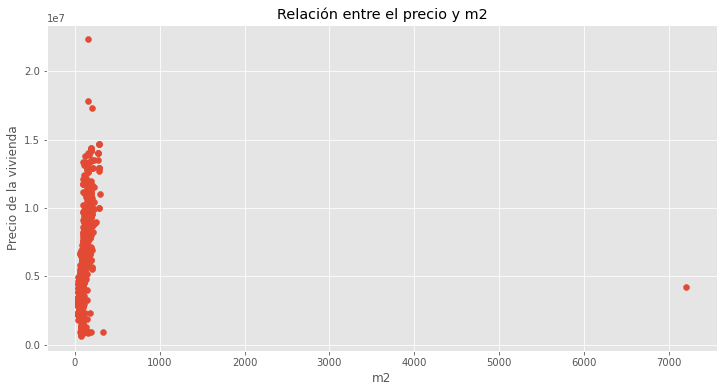

In [16]:
plt.scatter(x=df['m2'], y=df['price_mod'])
plt.title('Relación entre el precio y m2')
plt.xlabel("m2")
plt.ylabel("Precio de la vivienda")
plt.show()

Quitamos el outlier a la derecha para conocer mejor el comportamiento de ambas variables

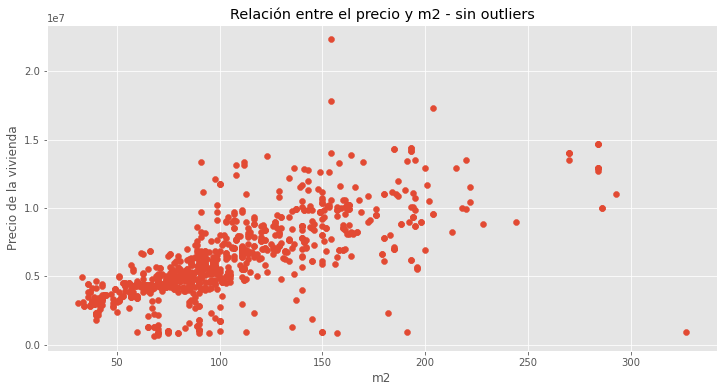

In [17]:
df_1 = df[df['m2']<max(df['m2'])]

plt.scatter(x=df_1['m2'], y=df_1['price_mod'])
plt.title('Relación entre el precio y m2 - sin outliers')
plt.xlabel("m2")
plt.ylabel("Precio de la vivienda")
plt.show()


Relacion del m2 con su precio

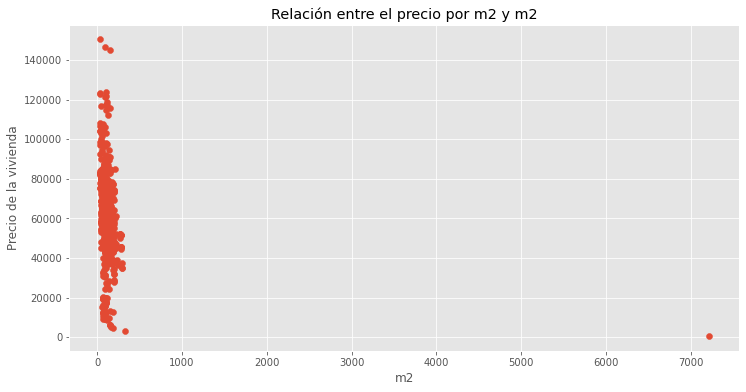

In [18]:
plt.scatter(x=df['m2'], y=df['price_square_meter'])
plt.title('Relación entre el precio por m2 y m2')
plt.xlabel("m2")
plt.ylabel("Precio de la vivienda")
plt.show()

Como es el comportamiento por cantidad de recamaras?

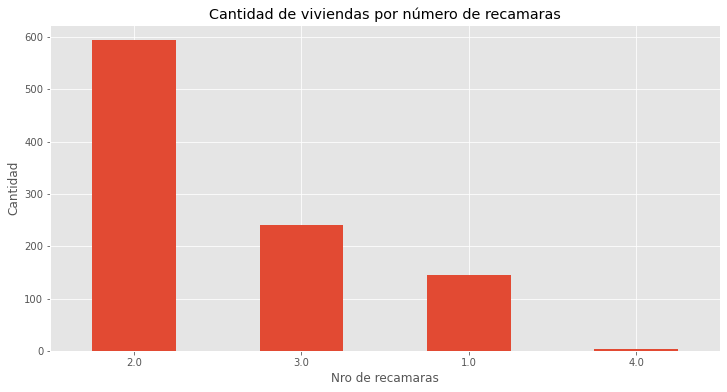

In [19]:
df.num_bedrooms.value_counts().plot(kind="bar")
plt.title("Cantidad de viviendas por número de recamaras")
plt.xlabel("Nro de recamaras")
plt.xticks(rotation=0)
plt.ylabel("Cantidad")
plt.show()

Respecto a la cantidad de sanitarios

<AxesSubplot:xlabel='num_bedrooms', ylabel='Count'>

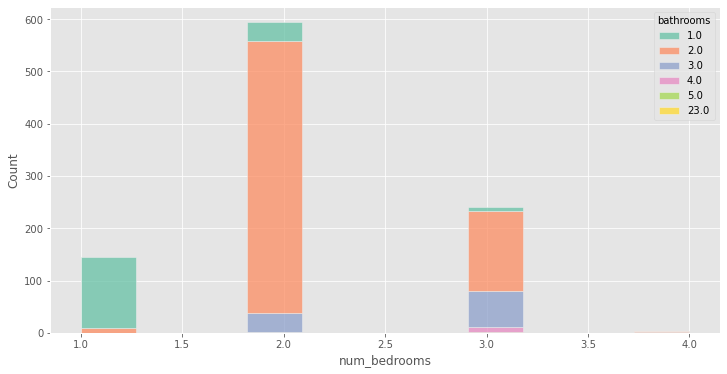

In [20]:
sns.histplot(x = df['num_bedrooms'], hue = df['bathrooms'], data=df,
             multiple = "stack", palette='Set2')


Cantidad de lugares de estacionamiento

<AxesSubplot:xlabel='num_bedrooms', ylabel='Count'>

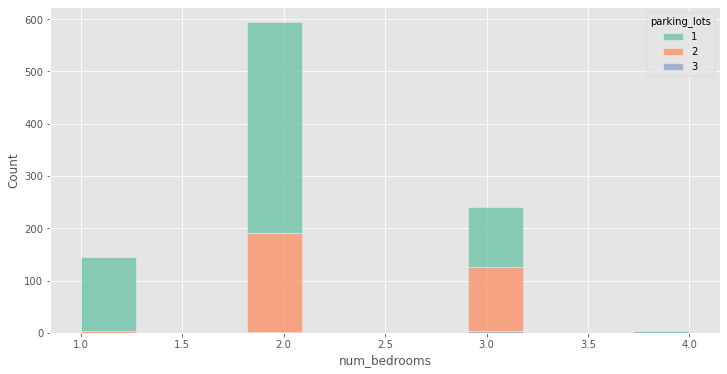

In [21]:
sns.histplot(x = df['num_bedrooms'], hue = df['parking_lots'], data=df,
             multiple = "stack", palette='Set2')


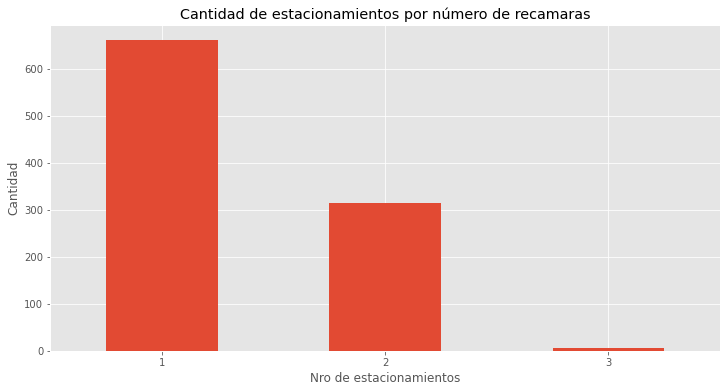

In [22]:
df.parking_lots.value_counts().plot(kind="bar")
plt.title("Cantidad de estacionamientos por número de recamaras")
plt.xlabel("Nro de estacionamientos")
plt.xticks(rotation=0)
plt.ylabel("Cantidad")
plt.show()

<AxesSubplot:xlabel='num_bedrooms', ylabel='bathrooms'>

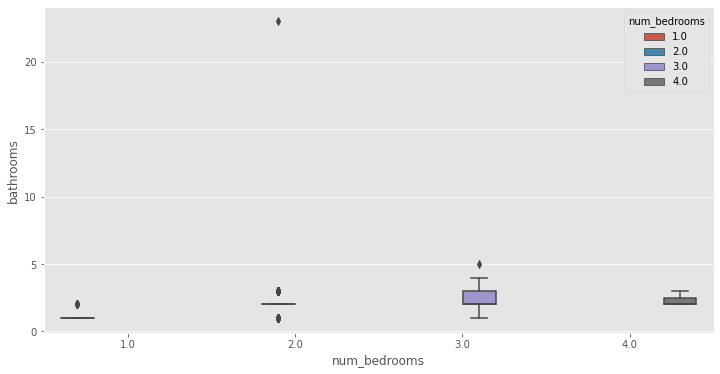

In [23]:
from seaborn import boxplot
boxplot(x='num_bedrooms', y='bathrooms', hue='num_bedrooms', data=df)

num_bedrooms
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price_mod, dtype: object

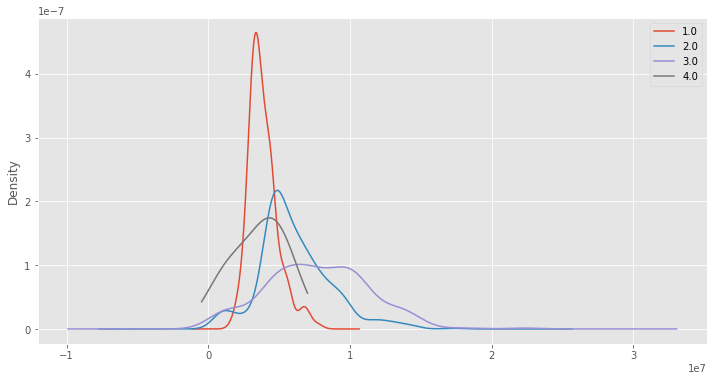

In [24]:
#group data by product and display sales as line chart
df.groupby('num_bedrooms')['price_mod'].plot(kind= 'density',legend=True)

relacion precio x numero de habitaciones

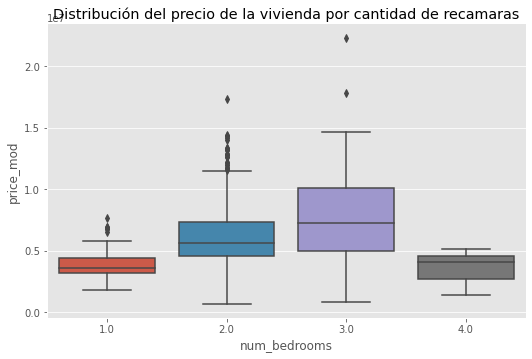

In [25]:
sns.catplot(x= 'num_bedrooms', y ='price_mod', data = df, kind = 'box', aspect = 1.5)
plt.title('Distribución del precio de la vivienda por cantidad de recamaras')
plt.show()

## relaciones combinadas de distintas variables e histogramas para comparar 

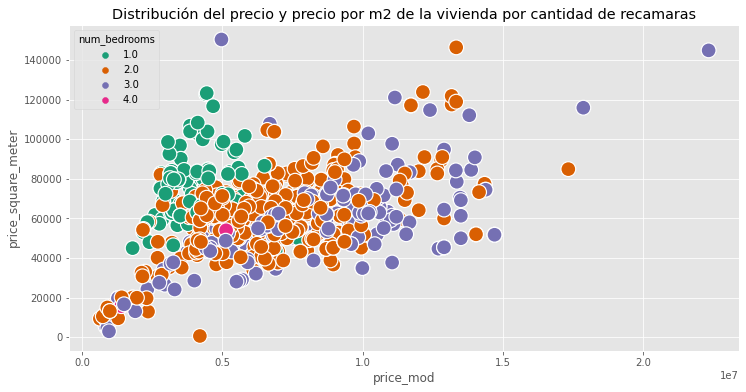

In [26]:
sns.scatterplot(x= 'price_mod', y ='price_square_meter', hue = 'num_bedrooms', data = df, palette="Dark2", s=220)
plt.title('Distribución del precio y precio por m2 de la vivienda por cantidad de recamaras')
plt.show()

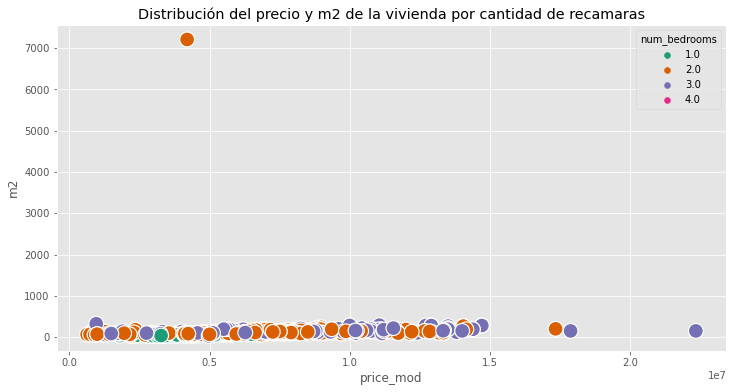

In [27]:
sns.scatterplot(x= 'price_mod', y ='m2', hue = 'num_bedrooms', data = df, palette="Dark2", s=220)
plt.title('Distribución del precio y m2 de la vivienda por cantidad de recamaras')
plt.show()

In [28]:
df

,id,price_mod,amenities,age_in_years,bathrooms,parking_lots,num_bedrooms,m2,price_square_meter,colonia
0,1,9000000.0,3.0,0.0,2.0,2,2.0,127.0,70866.141732,Roma Sur
1,2,4264000.0,2.0,0.0,1.0,1,1.0,54.0,78962.962963,Roma Norte
2,3,8093500.0,0.0,0.0,3.0,2,3.0,163.0,49653.374233,Roma Sur
3,4,4000000.0,2.0,0.0,2.0,1,2.0,93.0,43010.752688,Roma Sur
4,5,6732700.0,4.0,0.0,2.0,1,2.0,103.0,65366.019417,Roma Norte
...,...,...,...,...,...,...,...,...,...,...
976,981,6385000.0,0.0,0.0,2.0,2,2.0,140.0,45607.142857,Roma Sur
977,982,4116000.0,0.0,0.0,2.0,1,2.0,84.0,49000.000000,Roma Sur
978,983,4236000.0,0.0,0.0,2.0,1,2.0,88.0,48136.363636,Roma Sur
979,984,6620120.0,0.0,0.0,2.0,2,2.0,114.0,58071.228070,Roma Norte


Conteo de amenidades

<AxesSubplot:xlabel='amenities'>

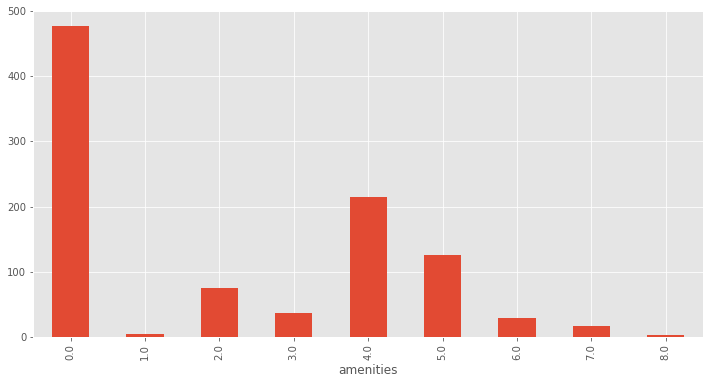

In [29]:
df.groupby('amenities').count()['id'].plot(kind='bar')

<AxesSubplot:xlabel='num_bedrooms', ylabel='Count'>

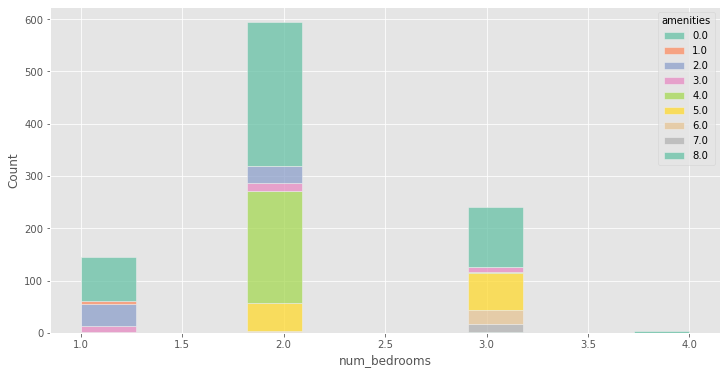

In [30]:
sns.histplot(x = df['num_bedrooms'], hue = df['amenities'], data=df,
             multiple = "stack", palette='Set2')

<AxesSubplot:xlabel='age_in_years'>

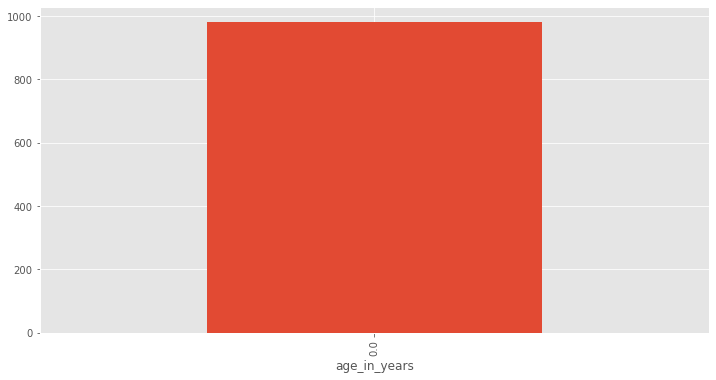

In [31]:
df.groupby('age_in_years').count()['id'].plot(kind='bar')

<AxesSubplot:xlabel='bathrooms'>

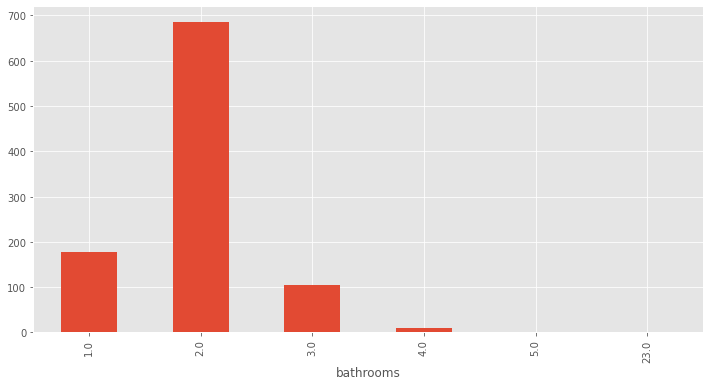

In [32]:
df.groupby('bathrooms').count()['id'].plot(kind='bar')

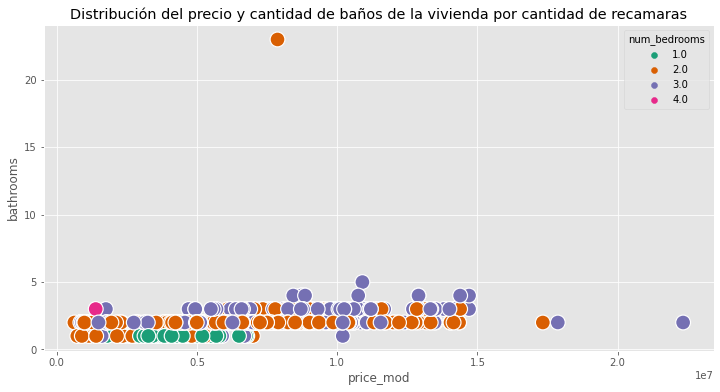

In [33]:
sns.scatterplot(x= 'price_mod', y ='bathrooms', hue = 'num_bedrooms', data = df, palette="Dark2", s=220)
plt.title('Distribución del precio y cantidad de baños de la vivienda por cantidad de recamaras')
plt.show()

<AxesSubplot:xlabel='parking_lots'>

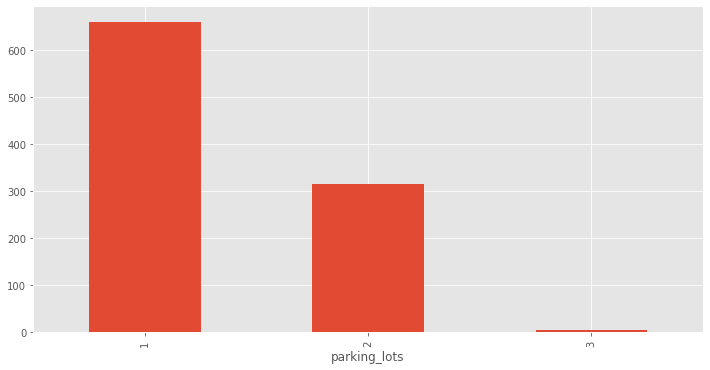

In [34]:
df.groupby('parking_lots').count()['id'].plot(kind='bar')

In [35]:
df = df.drop(['colonia'], axis=1)

### PCA para determinar las variables que afectan el precio de la vivienda

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
df.columns

Index(['id', 'price_mod', 'amenities', 'age_in_years', 'bathrooms',
       'parking_lots', 'num_bedrooms', 'm2', 'price_square_meter'],
      dtype='object')

In [38]:
features = ['price_mod', 'amenities', 'bathrooms','parking_lots', 'num_bedrooms', 'm2']

x = df.loc[:, features].values

#target = 'price_square_meter'

y = df.loc[:,['price_square_meter']].values

x = StandardScaler().fit_transform(x)

In [39]:
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(x)

PC_components = np.arange(pca.n_components_) + 1


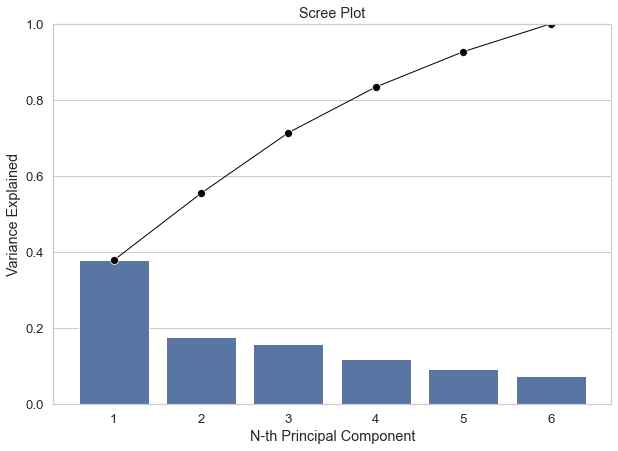

In [40]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=1, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()